[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_finite_domain_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# MultiMin: Finite domain quickstart

This notebook shows how to use **Composed Multivariate Normal** distributions (CMNDs) when variables have **finite support** (e.g. $[0,1]$).

## Truncated multivariate normals

When the domain is bounded, we use **partially truncated** multivariate normals. For truncation bounds $a_i < b_i$ on variables $i \in T$, the truncation region is
$$
A_T = \big\{ \tilde{U} \in \mathbb{R}^k \;:\; a_i \le \tilde{U}_i \le b_i \;\; \forall i \in T \big\}.
$$
The truncated PDF is
$$
\mathcal{TN}_T(\tilde{U}; \tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)
= \frac{\mathcal{N}(\tilde{U}; \tilde{\mu}, \Sigma) \, \mathbf{1}_{A_T}(\tilde{U})}{Z_T(\tilde{\mu}, \Sigma, \mathbf{a}_T, \mathbf{b}_T)},
$$
where $Z_T$ is the normalization constant (probability that $\tilde{T} \sim \mathcal{N}(\tilde{\mu},\Sigma)$ lies in $A_T$).

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [41]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import multimin as mn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 1D distribution on a finite domain

Define a mixture of two Gaussians on the interval $[0, 1]$. Use the **domain** parameter: each variable can be `None` (unbounded) or `[low, high]`.

In [49]:
CMND_1d = mn.ComposedMultiVariateNormal(
    mus=[0.2, 0.8],
    weights=[0.5, 0.5],
    Sigmas=[0.02, 0.02],
    domain=[[0, 1]]  # variable 0 bounded to [0, 1]
    #domain=[None]  # variable 0 bounded to [0, 1]
)

Sample and plot: all points lie in $[0, 1]$.

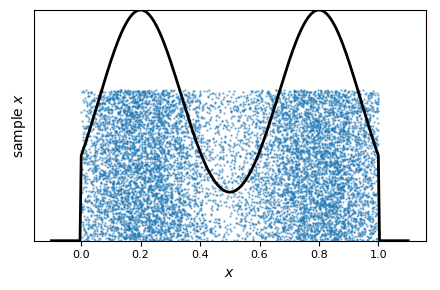

In [50]:
G = CMND_1d.plot_sample(
    props=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3,
)
plt.savefig("gallery/finite_domain_1d_sample.png")

The PDF is zero outside the domain:

In [51]:
print("PDF at 0.5 (inside):", CMND_1d.pdf(np.array([[0.5]])))
print("PDF at -0.1 (outside):", CMND_1d.pdf(np.array([[-0.1]])))

PDF at 0.5 (inside): 0.32270646073880693
PDF at -0.1 (outside): 0.0


## Fitting 1D data on a finite domain

Generate data from the same distribution and fit with **FitCMND(..., domain=[[0, 1]])**. The fitter uses the domain in the likelihood and (by default) bounds the means to the domain.

In [52]:
np.random.seed(42)
data_1d = CMND_1d.rvs(5000)

F_1d = mn.FitCMND(ngauss=2, nvars=1, domain=[[0, 1]])
F_1d.fit_data(data_1d, advance=True)

Iterations:
Iter 0:
	Vars: [0.7, -0.7, 0.1, 0.89, -4.1, -4.1]
	LogL/N: 0.03535849219040573
Iter 1:
	Vars: [0.13, -0.12, 0.19, 0.83, -4.1, -4.1]
	LogL/N: -0.07774317994638945
Iter 2:
	Vars: [-0.043, 0.049, 0.19, 0.78, -4.2, -4.2]
	LogL/N: -0.0819626126109378
Iter 3:
	Vars: [0.012, -0.0049, 0.19, 0.8, -4.2, -4.2]
	LogL/N: -0.08340499105753993
Iter 4:
	Vars: [0.0059, 0.00086, 0.19, 0.8, -4.2, -4.2]
	LogL/N: -0.08353230414551442
Iter 5:
	Vars: [-0.022, 0.028, 0.19, 0.79, -4.2, -4.2]
	LogL/N: -0.08452649794380458
Iter 6:
	Vars: [-0.01, 0.017, 0.2, 0.79, -4.2, -4.2]
	LogL/N: -0.08533648407416158
Iter 7:
	Vars: [0.0055, 0.00074, 0.2, 0.79, -4.2, -4.2]
	LogL/N: -0.08561089940464862
Iter 8:
	Vars: [0.037, -0.031, 0.2, 0.79, -4.2, -4.3]
	LogL/N: -0.08582307464037822
Iter 9:
	Vars: [0.035, -0.029, 0.2, 0.79, -4.2, -4.3]
	LogL/N: -0.08582932014211152
Iter 10:
	Vars: [0.036, -0.03, 0.2, 0.79, -4.2, -4.3]
	LogL/N: -0.08582999298375946
Iter 11:
	Vars: [0.039, -0.033, 0.2, 0.79, -4.2, -4.3]
	LogL/N: -

In [53]:
F_1d.cmnd.tabulate(sort_by="weight")

,w,mu_1,sigma_1
component,,,
1,0.509511,0.199069,0.14388
2,0.490489,0.791916,0.13848


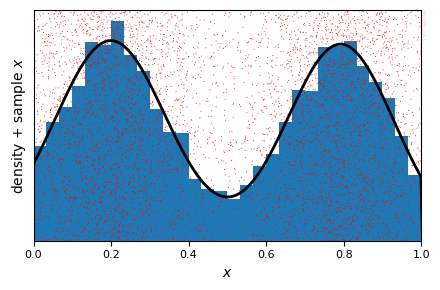

In [54]:
F_1d.plot_fit(
    props=["x"],
    ranges=[[0, 1]],
    hargs=dict(bins=30, cmap="Spectral_r"),
    sargs=dict(s=0.5, edgecolor="None", color="r"),
    figsize=3,
)
plt.savefig("gallery/finite_domain_1d_fit.png")

In [18]:
print("Fitted parameters:")
F_1d.cmnd.tabulate(sort_by="weight")

Fitted parameters:


,w,mu_1,sigma_1
component,,,
1,0.821614,0.0,2.0
2,0.178386,1.0,2.0


## 3D distribution with one variable on a finite domain

Use **domain=[None, [0, 1], None]**: variables 0 and 2 are unbounded; variable 1 is bounded to $[0, 1]$.

In [34]:
weights = [0.5, 0.5]
mus = [[0.0, 0.3, 0.0], [0.0, 0.7, 0.0]]  # two bumps along the bounded variable (y)
sigmas = [[0.6, 0.15, 0.6], [0.6, 0.15, 0.6]]
Sigmas = [np.diag(s)**2 for s in sigmas]

CMND_3d = mn.ComposedMultiVariateNormal(
    mus=mus,
    weights=weights,
    Sigmas=Sigmas,
    domain=[None, [0, 1], None],  # only variable 1 in [0, 1]
)

Samples: the first and third coordinates are unbounded; the second coordinate lies in $[0, 1]$.

In [35]:
sample_3d = CMND_3d.rvs(3000)
print("Variable 1 (bounded) min/max:", sample_3d[:, 1].min(), sample_3d[:, 1].max())
print("All variable 1 in [0,1]:", np.all((sample_3d[:, 1] >= 0) & (sample_3d[:, 1] <= 1)))

Variable 1 (bounded) min/max: 0.00162405369977775 0.9999990371252736
All variable 1 in [0,1]: True


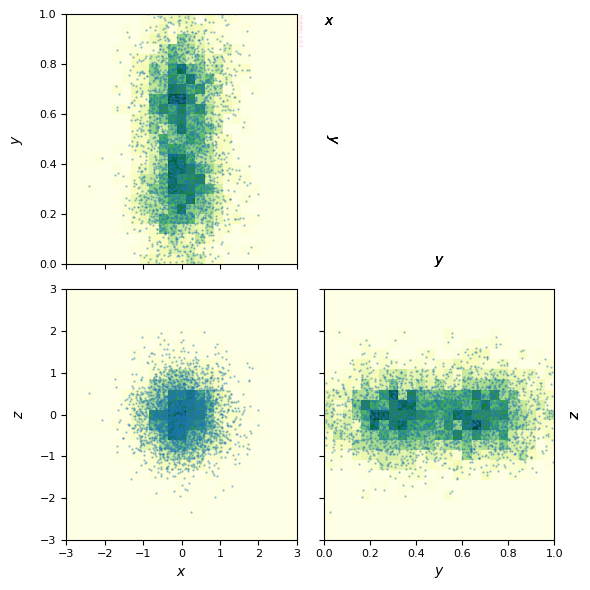

In [36]:
G3 = CMND_3d.plot_sample(
    data=sample_3d,
    props=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    figsize=3,
    hargs=dict(bins=25, cmap="YlGn"),
    sargs=dict(s=0.3, alpha=0.5),
)
plt.tight_layout()
plt.savefig("gallery/finite_domain_3d_sample.png")
plt.show()

## Fitting 3D data with a finite domain on one variable

Fit with `domain=[None, [0, 1], None]` so the likelihood and mean bounds respect the second variable’s domain.

In [37]:
np.random.seed(123)
data_3d = CMND_3d.rvs(5000)

F_3d = mn.FitCMND(ngauss=2, nvars=3, domain=[None, [0, 1], None])
F_3d.fit_data(data_3d, advance=True)

Iterations:
Iter 0:
	Vars: [-0.041, 0.041, 0.0053, 0.33, -0.0063, 0.019, 0.67, 0.0092, -2.2, -2.2, -2.2, -2.2, -2.2, -2.2, 1.1, 1.2, 1.1, 1.2, 1.2, 1.2]
	LogL/N: 2.0301216189834737
Iter 1:
	Vars: [-0.052, 0.052, -0.12, 0.35, -0.12, -0.052, 0.64, -0.056, -2.4, -2.2, -2.4, -2.4, -2.2, -2.4, 1.1, 1.2, 1.1, 1.2, 1.2, 1.2]
	LogL/N: 1.9118531812575543
Iter 2:
	Vars: [-0.051, 0.051, 0.015, 0.39, 0.0046, 0.1, 0.64, 0.1, -2.5, -2.2, -2.5, -2.6, -2.2, -2.6, 1.2, 1.1, 1.2, 1.3, 1.1, 1.3]
	LogL/N: 1.870352947631506
Iter 3:
	Vars: [-0.053, 0.053, -0.0032, 0.39, -0.018, 0.076, 0.64, 0.083, -2.5, -2.2, -2.5, -2.6, -2.2, -2.5, 1.2, 1, 1.2, 1.3, 0.98, 1.3]
	LogL/N: 1.8534341917393846
Iter 4:
	Vars: [-0.059, 0.059, 0.0092, 0.41, -0.037, 0.052, 0.66, 0.081, -2.6, -2.1, -2.6, -2.6, -2.1, -2.6, 1.2, 0.72, 1.3, 1.4, 0.68, 1.4]
	LogL/N: 1.837189717357693
Iter 5:
	Vars: [-0.055, 0.055, 0.032, 0.4, -0.018, 0.03, 0.66, 0.083, -2.5, -2.1, -2.5, -2.6, -2.1, -2.5, 1.2, 0.75, 1.2, 1.3, 0.7, 1.3]
	LogL/N: 1.83274244

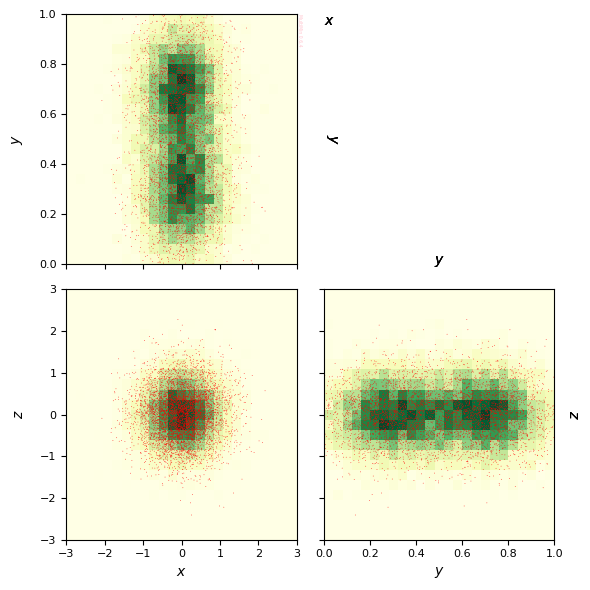

In [38]:
F_3d.plot_fit(
    props=["x", "y", "z"],
    ranges=[[-3, 3], [0, 1], [-3, 3]],
    hargs=dict(bins=25, cmap="YlGn"),
    sargs=dict(s=0.3, edgecolor="None", color="r"),
    figsize=3,
)
plt.tight_layout()
plt.savefig("gallery/finite_domain_3d_fit.png")
plt.show()

In [39]:
CMND_3d.tabulate(sort_by="distance")

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,0.0,0.3,0.0,0.6,0.15,0.6,0.0,0.0,0.0
2,0.5,0.0,0.7,0.0,0.6,0.15,0.6,0.0,0.0,0.0


In [40]:
print("Fitted parameters (note variable 2 = y in [0,1]):")
F_3d.cmnd.tabulate(sort_by="distance")

Fitted parameters (note variable 2 = y in [0,1]):


,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.489269,0.042185,0.291191,-0.002695,0.605649,0.150395,0.595900,0.015624,0.005927,-0.013238
2,0.510731,-0.005626,0.699462,0.026579,0.591052,0.151099,0.610333,0.034011,0.018931,-0.010969


---
**MultiMin** – Multivariate Gaussian fitting with finite domains  
© 2026 Jorge I. Zuluaga